<a href="https://colab.research.google.com/github/LilianaArguello/ciencia_de_datos_con_python_Analisis_de_Datos/blob/master/Data_Science_con_Python_Limpieza_de_Datos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de Datos

La limpieza de datos es importante porque el no detectar datos erróneos puede llevar a conclusiones incorrectas o simplemente impedirnos seguir con los pasos de análisis.

En primera instancia, la limpieza empieza con la exploración de los datos y podemos usar los siguientes comandos:

    .info()
    .describe()
    .astype()
    .str.strip()
    .duplicated()
    .loc[indice,columna]
    .drop_duplicates()
    .groupby(by=columname)
    .groupby(by=columname).agg()
    .sort_values
    set().difference()
    .isin()
    .unique()


In [ ]:
# Importar todas las librerías para ejecutar comandos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(np.random.rand(12,2), columns=['A', 'B'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       12 non-null     float64
 1   B       12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


In [ ]:
df.head()

,A,B
0,0.891437,0.407875
1,0.406562,0.463328
2,0.642438,0.511924
3,0.941541,0.924043
4,0.691172,0.377897


In [ ]:
df.tail()

,A,B
7,0.053383,0.462785
8,0.414693,0.912979
9,0.877898,0.488036
10,0.082193,0.991721
11,0.961441,0.054600


In [ ]:
df.describe()

,A,B
count,12.000000,12.000000
mean,0.566385,0.592304
std,0.318485,0.295252
min,0.053383,0.054600
25%,0.397903,0.449057
50%,0.552186,0.499980
75%,0.881283,0.915745
max,0.961441,0.993818


In [ ]:
df.astype(int)

,A,B
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## Slicing (rebanado)
Una de las herramientas más poderosas que provee pandas Dataframe es que nos permite manipular subconjuntos de datos de DataFrame para nuestra conveninecia.

In [ ]:
print(df)

           A         B
0   0.891437  0.407875
1   0.406562  0.463328
2   0.642438  0.511924
3   0.941541  0.924043
4   0.691172  0.377897
5   0.371926  0.993818
6   0.461935  0.518647
7   0.053383  0.462785
8   0.414693  0.912979
9   0.877898  0.488036
10  0.082193  0.991721
11  0.961441  0.054600


In [ ]:
df

,A,B
0,0.891437,0.407875
1,0.406562,0.463328
2,0.642438,0.511924
3,0.941541,0.924043
4,0.691172,0.377897
5,0.371926,0.993818
6,0.461935,0.518647
7,0.053383,0.462785
8,0.414693,0.912979
9,0.877898,0.488036


In [ ]:
#Tomar únicamente datos donde A > 0.5
subset = df[df['A']>0.5]
print(subset)

           A         B
0   0.891437  0.407875
2   0.642438  0.511924
3   0.941541  0.924043
4   0.691172  0.377897
9   0.877898  0.488036
11  0.961441  0.054600


In [ ]:
subset

,A,B
0,0.891437,0.407875
2,0.642438,0.511924
3,0.941541,0.924043
4,0.691172,0.377897
9,0.877898,0.488036
11,0.961441,0.054600


In [ ]:
# Observamos que conserva los índices anteriores
subset.index

Int64Index([0, 2, 3, 4, 9, 11], dtype='int64')

In [ ]:
# Si nos interesa tener un nuevo DataFrame sin estos índices
subset.reset_index(inplace=True, drop=True)
print(subset)

          A         B
0  0.891437  0.407875
1  0.642438  0.511924
2  0.941541  0.924043
3  0.691172  0.377897
4  0.877898  0.488036
5  0.961441  0.054600


In [ ]:
# Observa como cambia la forma de impresión al usar print en los DataFrames
subset

,A,B
0,0.891437,0.407875
1,0.642438,0.511924
2,0.941541,0.924043
3,0.691172,0.377897
4,0.877898,0.488036
5,0.961441,0.054600


In [ ]:
new_df = pd.DataFrame(
                        data=[['Amsterdam','rojo'],['Paris', 'azul'],['Mexico','rojo']], 
                        columns=['Lugar','Color'])

In [ ]:
new_df

,Lugar,Color
0,Amsterdam,rojo
1,Paris,azul
2,Mexico,rojo


In [ ]:
# Buscar duplicados
new_df['Color'].duplicated()

0    False
1    False
2     True
Name: Color, dtype: bool

In [ ]:
# Buscar los valores únicos de una columna
new_df['Color'].unique()

array(['rojo', 'azul'], dtype=object)

In [ ]:
# Rebanar las filas donde se cumple la condición
new_df[new_df['Color'] == 'rojo']

,Lugar,Color
0,Amsterdam,rojo
2,Mexico,rojo


In [ ]:
# Asignar a una variable
rojo = new_df[new_df['Color'] == 'rojo']

In [ ]:
rojo

,Lugar,Color
0,Amsterdam,rojo
2,Mexico,rojo


In [ ]:
# Hagamos un DataFrame con strings dentro
combined_df = pd.DataFrame(data=[['Amsterdam','numero 2'],['Paris', 'numero 6'],['Mexico','numero 7']], columns=['Lugar','Numero'])

In [ ]:
combined_df

,Lugar,Numero
0,Amsterdam,numero 2
1,Paris,numero 6
2,Mexico,numero 7


In [ ]:
# Localizar un valor de acuerdo a su índice y columna
combined_df.loc[1,'Lugar']

'Paris'

In [ ]:
# Seleccionar sólo uan columna del DataFrame
combined_df['Numero']

0    numero 2
1    numero 6
2    numero 7
Name: Numero, dtype: object

In [ ]:
# Retirar cierto string a una columna entera
combined_df['Numero'].str.strip('numero ')

0    2
1    6
2    7
Name: Numero, dtype: object

In [ ]:
serie = combined_df['Numero'].str.strip('numero')
# Checa el tipo de variable
serie[0]

' 2'

In [ ]:
# Retirar el espacio faltante a la serie
serie.str.strip(' ')

0    2
1    6
2    7
Name: Numero, dtype: object

In [ ]:
serie_2 = serie.str.strip(' ')
# Checa el tipo de variable
serie_2[0]

'2'

In [ ]:
# Checar el tipo de dato
type(serie_2[0])

str

In [ ]:
# Convertir la serie a int para hacer operaciones
serie_2.astype(int)

0    2
1    6
2    7
Name: Numero, dtype: int64

In [ ]:
# Ejercicio con datos nulos dentro de un DataFrame
nan_df = pd.DataFrame(
                        data=[['Amsterdam', np.nan],['Paris', 'azul'],['Mexico','rojo']], 
                        columns=['Lugar','Color'])

In [ ]:
nan_df

,Lugar,Color
0,Amsterdam,NaN
1,Paris,azul
2,Mexico,rojo


In [ ]:
# Verificar datos nulos o faltantes
nan_df.isnull()

,Lugar,Color
0,False,True
1,False,False
2,False,False


In [ ]:
# Se puede imputar un dato de acuerdo al conocimeinto del origen de los datos
nan_df.fillna('neutro')

,Lugar,Color
0,Amsterdam,neutro
1,Paris,azul
2,Mexico,rojo


In [ ]:
# O eliminar la columna si no hace sentido
nan_df.dropna()

,Lugar,Color
1,Paris,azul
2,Mexico,rojo


Vamos a ver una función muy específica de una librería que nos permite contar los elementos de una lista, arreglo o Serie. Esta librería se llama *collections* y usaremos la función **Counter**

In [ ]:
from collections import Counter
data = ['a','a','b','c','c']
count = Counter(data)
print(count)

Counter({'a': 2, 'c': 2, 'b': 1})


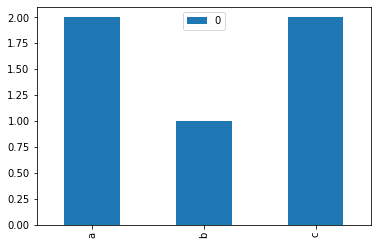

In [ ]:
# Vamos a visualizar al colocar la información en un DataFrame y a usar una función de gráfica directa del módulo de pandas.
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')
plt.show()